# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [ ]:
df = pd.read_excel(r"C:\Users\USER\Desktop\Client Data Projects\pergas_app\notebook\data\enquiries.xlsx")

# 1- Data Checks

1. Check data variables
2. Check statistics
3. Check unique values
4. Check duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Day                                          1949 non-null   object        
 1   Date                                         1949 non-null   datetime64[ns]
 2   Week                                         1949 non-null   int64         
 3   Start Time                                   1949 non-null   object        
 4   Hour                                         1949 non-null   int64         
 5   Source                                       1949 non-null   object        
 6   Purpose of contact                           1949 non-null   object        
 7   Description                                  1949 non-null   object        
 8   Is the enquirer a student?                   1949 non-null   object        
 9

In [ ]:
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M:%S').dt.time
df['End Time'] = pd.to_datetime(df['End Time'], format='%H:%M:%S').dt.time

## 1. Volume of Inquiries per Day/Week

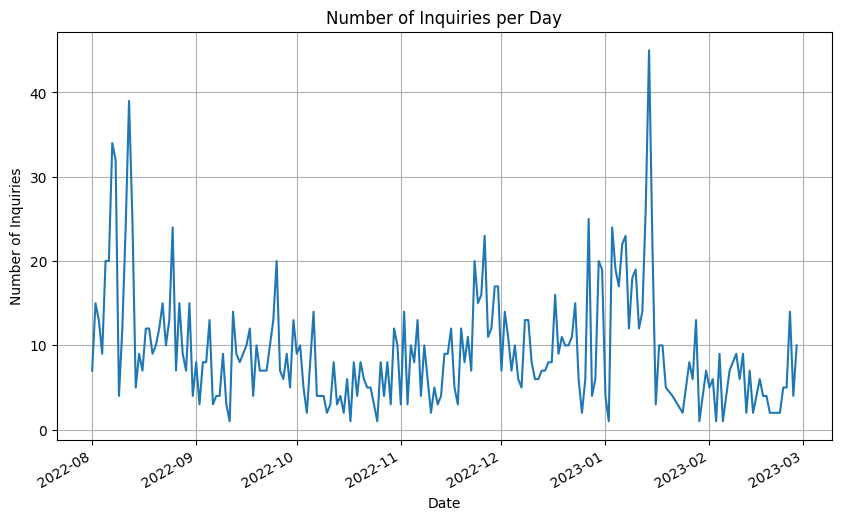

In [6]:
# Group by 'Date' or 'Week' to get count of inquiries per day/week
inquiries_per_day = df.groupby('Date').size()

# Plot
plt.figure(figsize=(10, 6))
inquiries_per_day.plot(kind='line')
plt.title('Number of Inquiries per Day')
plt.xlabel('Date')
plt.ylabel('Number of Inquiries')
plt.grid(True)
plt.show()

## 2. Average Duration of Cases

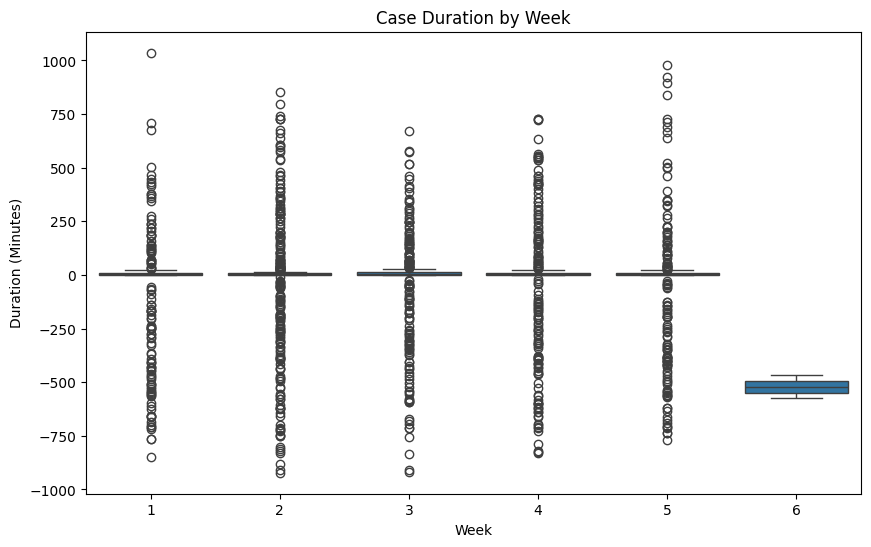

In [7]:
# Calculate duration in minutes or seconds
df['Duration'] = (pd.to_datetime(df['End Time'].astype(str)) - pd.to_datetime(df['Start Time'].astype(str))).dt.total_seconds() / 60

# Plot average duration per week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Week', y='Duration', data=df)
plt.title('Case Duration by Week')
plt.xlabel('Week')
plt.ylabel('Duration (Minutes)')
plt.show()

## 3. Inquiries by Source

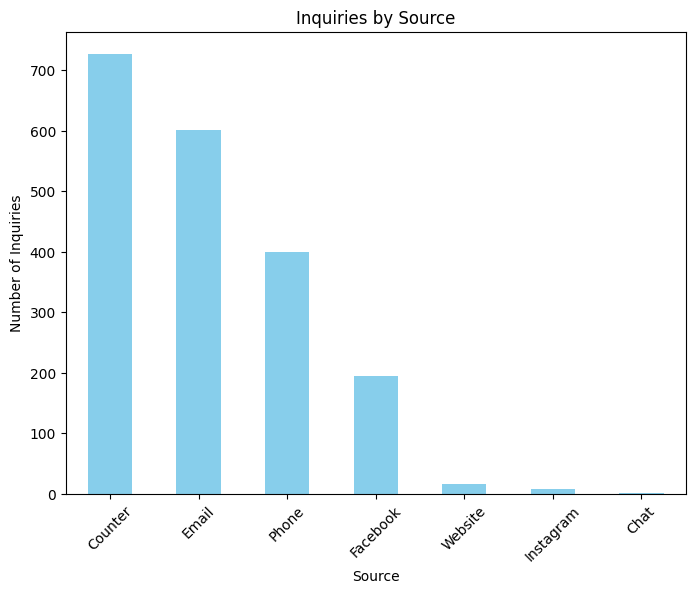

In [8]:
# Count inquiries by Source
inquiries_by_source = df['Source'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
inquiries_by_source.plot(kind='bar', color='skyblue')
plt.title('Inquiries by Source')
plt.xlabel('Source')
plt.ylabel('Number of Inquiries')
plt.xticks(rotation=45)
plt.show()

## 4. Resolved vs. Unresolved Cases

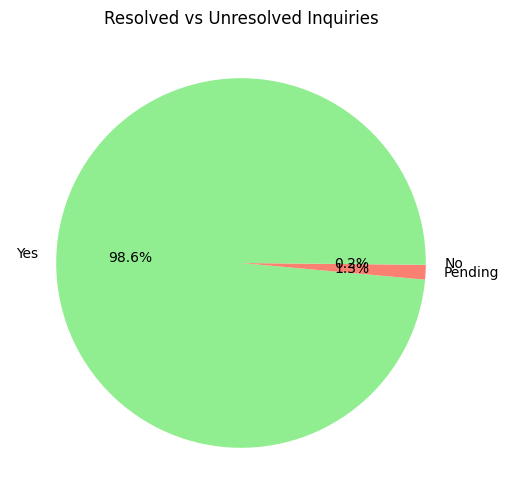

In [9]:
# Plot Resolved vs Unresolved
plt.figure(figsize=(6, 6))
df['Has the problem resolved?'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Resolved vs Unresolved Inquiries')
plt.ylabel('')
plt.show()

## 5. Inquiries by Category

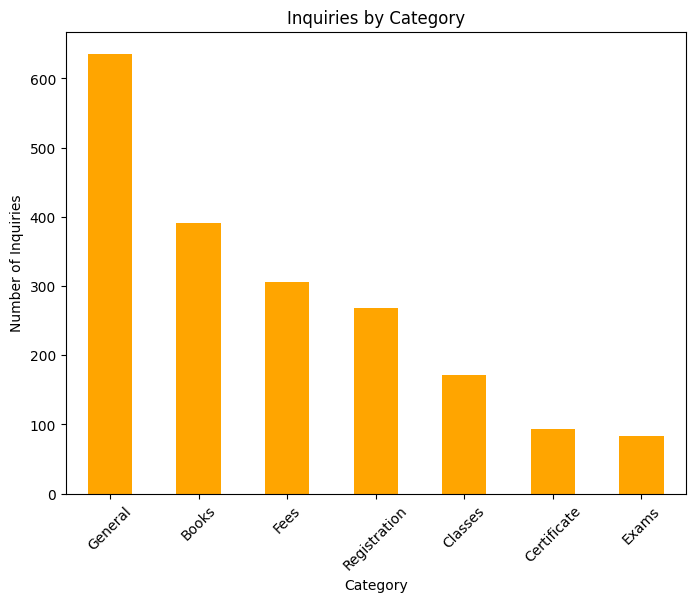

In [10]:
# Count inquiries by Category
inquiries_by_category = df['Category'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
inquiries_by_category.plot(kind='bar', color='orange')
plt.title('Inquiries by Category')
plt.xlabel('Category')
plt.ylabel('Number of Inquiries')
plt.xticks(rotation=45)
plt.show()

## 6. Time to Resolution by Category

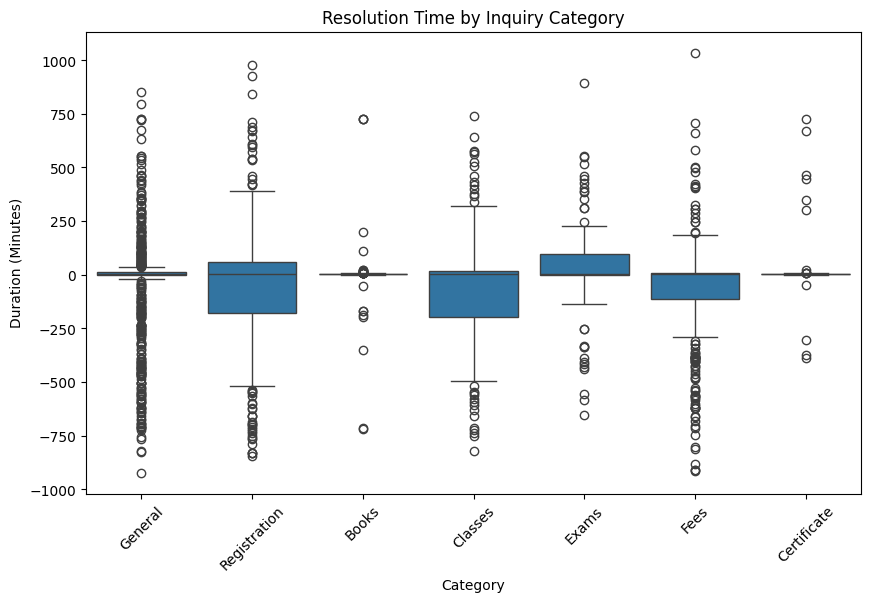

In [11]:
# Boxplot of duration (time to resolution) by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Duration', data=df)
plt.title('Resolution Time by Inquiry Category')
plt.xlabel('Category')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

## 7. Student vs. Non-Student Analysis

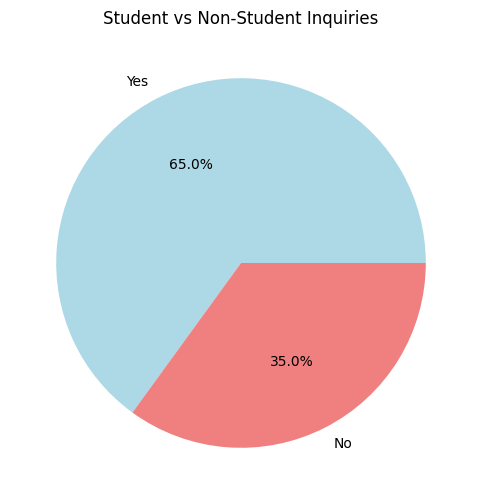

In [12]:
# Plot Student vs Non-Student inquiries
plt.figure(figsize=(6, 6))
df['Is the enquirer a student?'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Student vs Non-Student Inquiries')
plt.ylabel('')
plt.show()

## 8. Case Forwarding Analysis

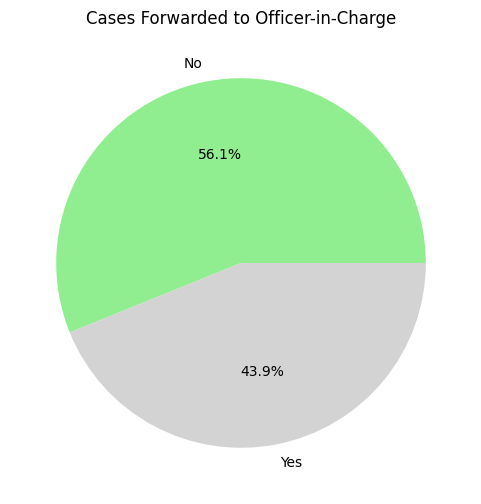

In [13]:
# Plot Forwarded vs Non-Forwarded Cases
plt.figure(figsize=(6, 6))
df['Is the case forwarded to officer-in-charge?'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightgray'])
plt.title('Cases Forwarded to Officer-in-Charge')
plt.ylabel('')
plt.show()

In [7]:
# Summary Statistics
print(df[['Week', 'Hour']].describe())

              Week         Hour
count  1949.000000  1949.000000
mean      2.908671    13.832222
std       1.340367     4.051398
min       1.000000     0.000000
25%       2.000000    11.000000
50%       3.000000    14.000000
75%       4.000000    17.000000
max       6.000000    23.000000


In [14]:
# Function Data Distribution for Category and Source

def viz_category_source(df):
# Calculate the frequency of the 'Category' column
    category_frequency = df['Category'].value_counts().reset_index()
    category_frequency.columns = ['Category', 'Frequency']

    # Sort the data by the frequency in descending order
    category_frequency = category_frequency.sort_values(by='Frequency', ascending=False)

    # Create the bar chart using Seaborn
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Frequency', y='Category', data=category_frequency, palette='viridis')
    plt.show()

    #-----------------------------------

    # Calculate the frequency of the 'Source' column
    source_frequency = df['Source'].value_counts().reset_index()
    source_frequency.columns = ['Source', 'Frequency']

    # Sort the data by the frequency in descending order
    source_frequency = source_frequency.sort_values(by='Frequency', ascending=False)

    # Create the bar chart using Seaborn
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Frequency', y='Source', data=source_frequency, palette='viridis')
    plt.show()

In [15]:
# Function Data Distribution for Attended by and Closed by

def viz_attended_closed(df):

    # Calculate the frequency of the 'Category' column
    attended_frequency = df['Attended by'].value_counts().reset_index()
    attended_frequency.columns = ['Attended by', 'Frequency']

    # Sort the data by the frequency in descending order
    attended_frequency = attended_frequency.sort_values(by='Frequency', ascending=False)

    # Create the bar chart using Seaborn
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Frequency', y='Attended by', data=attended_frequency, palette='pastel')
    plt.show()

    #-----------------------------------

    # Calculate the frequency of the 'Source' column
    closed_frequency = df['Closed by'].value_counts().reset_index()
    closed_frequency.columns = ['Closed by', 'Frequency']

    # Sort the data by the frequency in descending order
    closed_frequency = closed_frequency.sort_values(by='Frequency', ascending=False)

    # Create the bar chart using Seaborn
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Frequency', y='Closed by', data=closed_frequency, palette='pastel')
    plt.show()

In [16]:
# Function for time-series analysis

def time_series_analysis(df):
    # Time-Series Analysis
    df['Date'] = pd.to_datetime(df['Date'])
    daily_counts = df.groupby('Date').size()
    plt.figure(figsize=(12, 6))
    daily_counts.plot()
    plt.xlabel('Date')
    plt.ylabel('Number of Enquiries')
    plt.title('Daily Enquiry Trends')
    plt.show()

In [17]:
df['Start Time'] = df['Start Time'].astype(str)
df['End Time'] = df['End Time'].astype(str)

df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Create new column 'time taken'
df['time_taken'] = df['End Time'] - df['Start Time']

# Convert the 'time_taken' column to string
df['time_taken'] = df['time_taken'].astype(str)

# Replace '-' with '+' in the 'time_taken' column
df['time_taken'] = df['time_taken'].str.replace('-', '+')

# Convert the 'time_taken' column back to timedelta (if needed)
df['time_taken'] = pd.to_timedelta(df['time_taken'])

df['time_taken']

0                  NaT
1      0 days 03:24:00
2      1 days 17:12:00
3      1 days 21:11:00
4      0 days 06:17:00
             ...      
1944   0 days 00:05:00
1945   0 days 00:05:00
1946   0 days 00:05:00
1947   1 days 13:28:00
1948   0 days 01:20:00
Name: time_taken, Length: 1949, dtype: timedelta64[ns]

In [18]:
# Function Data Distribution of time taken

def viz_respond_time(df):
    
    # Convert the 'time_taken' column to seconds
    df['time_taken_seconds'] = df['time_taken'].dt.total_seconds()

    df['time_taken_seconds']

    # Create a histogram to show the distribution of time taken in seconds
    plt.figure(figsize=(8, 4))
    plt.hist(df['time_taken_seconds'], bins=20, color='blue', alpha=0.7)
    plt.xlabel('Time Taken (seconds)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Time Taken')
    plt.show()

    # Filter the data to include certain values
    filtered_data = df[(df['time_taken_seconds'] <= 300)]

    # Create a histogram to show the distribution of time taken in seconds (limited to 5 mins)
    plt.figure(figsize=(8, 4))
    plt.hist(filtered_data['time_taken_seconds'], bins=20, color='blue', alpha=0.7)
    plt.xlabel('Time Taken (seconds)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Time Taken (up to 5 mins)')
    plt.show()
    
    print(df['time_taken_seconds'].value_counts())

In [13]:
# Missing Data
missing_data = df.isnull().sum()
print(missing_data)
print('------------')
print(f'Missing values account to only', round(36/1949*100), '% of total values')

Day                                             0
Date                                            0
Week                                            0
Start Time                                      0
Hour                                            0
Source                                          0
Purpose of contact                              0
Description                                     0
Is the enquirer a student?                      0
Category                                        0
Action Taken                                   31
Is the case forwarded to officer-in-charge?     0
Has the problem resolved?                       0
Attended by                                    33
Closed by                                      34
End Date                                       34
End Time                                       36
time_taken                                     36
dtype: int64
------------
Missing values account to only 2 % of total values


In [14]:
#Function for text analysis of 'Description' column

from wordcloud import WordCloud

def word_cloud_enquiry(df):

    text_data = df['Description'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Description Text')
    plt.show()

In [15]:
# Cross-tabulations and Pivot Tables
cross_tab = pd.crosstab(df['Category'], df['Purpose of contact'])
print(cross_tab)

Purpose of contact  Enquiry  Transaction
Category                                
Books                    62          329
Certificate              42           51
Classes                 172            0
Exams                    66           17
Fees                     83          223
General                 561           75
Registration             93          175


In [16]:
# Boolean Columns
bool_columns = ['Is the case forwarded to officer-in-charge?', 'Has the problem resolved?']
for column in bool_columns:
    print(df[column].value_counts())

Is the case forwarded to officer-in-charge?
No     1094
Yes     855
Name: count, dtype: int64
Has the problem resolved?
Yes        1921
Pending      25
No            3
Name: count, dtype: int64


In [17]:
# Action Taken Analysis
action_taken_counts = df['Action Taken'].value_counts()
print(action_taken_counts)

Action Taken
Advised accordingly                                                             513
Received payment and issued book                                                214
Received payment and adviced accordingly                                        183
Adviced accordingly                                                              98
Adviced Accordingly                                                              84
                                                                               ... 
Received contract and placed on Ustaz Hasan's desk                                1
Received the registration payment                                                 1
Handed over exam papers to Ustaz Abdillah and book to Ustazah Roslina Ismail      1
Advised accordingly. (Came on 1 Sep 2022 at 12:28 PM)                             1
Received payment and Issued certificate                                           1
Name: count, Length: 268, dtype: int64


# Business relevant analysis

## 1. Customer Experience Improvement

### Response Time Analysis

- **Average Response Time:** 

Calculate the average time taken to address customer inquiries from start to end. Analyze this by "Category" or "Source" to identify bottlenecks.
- **Response Time by Inquiry Type:** 

Identify which inquiry types (from the "Purpose of contact" or "Category" fields) take the longest to address. This helps prioritize operational improvements.
- **First Contact Resolution Rate:** 

Measure the percentage of cases resolved without forwarding to another officer. A high first-contact resolution rate generally indicates more efficient service.


In [19]:
# Calculate First Contact Resolution Rate
fcr_rate = df[df['Is the case forwarded to officer-in-charge?'] == 'No']['Has the problem resolved?'].value_counts(normalize=True) * 100
print(fcr_rate)

Has the problem resolved?
Yes        99.268739
Pending     0.457038
No          0.274223
Name: proportion, dtype: float64


- **Satisfaction Correlation:** 

If you have a measure of customer satisfaction (e.g., survey ratings post-inquiry), correlate the satisfaction scores with various features like resolution time, source of inquiry, or whether the case was forwarded.

## 2. Operational Efficiency
### Staff Performance

- **Cases Handled per Staff:** 

Evaluate the number of cases handled by each staff member ("Attended by", "Closed by"). This will highlight who is handling more cases and who may need additional support.
- **Resolution Efficiency:** 

Analyze average resolution times by staff member to identify top performers and areas where additional training may be needed.

In [20]:
# Cases handled by staff
cases_per_staff = df['Attended by'].value_counts()
print(cases_per_staff)

Attended by
Taqy           748
Amruu          573
Hidayah        360
Zahirah        147
Abdillah        49
Afiq            20
Others           7
Rooslina         7
Fateha           2
Faizal           1
Ustaz Hasan      1
Sofiy            1
Name: count, dtype: int64


- **Workload Distribution:** 

Analyze how workload varies across time (e.g., weeks, months) and across different team members. This can inform better staffing or schedule adjustments to optimize resources.

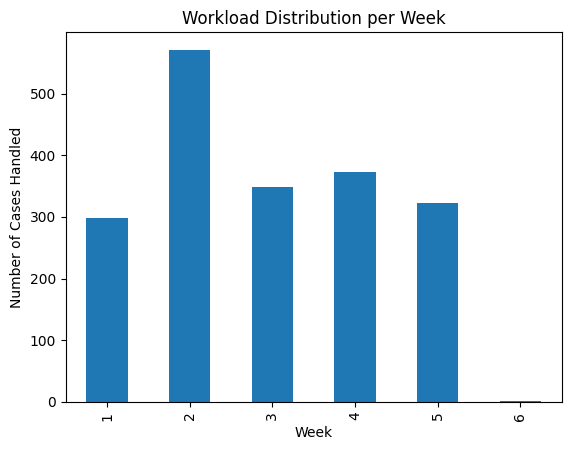

In [21]:
# Plot workload per week
workload_per_week = df.groupby('Week')['Attended by'].count()
workload_per_week.plot(kind='bar')
plt.title('Workload Distribution per Week')
plt.xlabel('Week')
plt.ylabel('Number of Cases Handled')
plt.show()

## 3. Channel Performance (Source of Inquiries)

- **Customer Engagement by Channel:**

Analyze which sources (e.g., phone, email, website) are most frequently used for inquiries. This can inform decisions on where to allocate resources for customer support or marketing.

- **Resolution Efficiency by Source:** 

Compare how effectively inquiries from different channels are resolved. If one channel (e.g., phone vs. website) has a lower resolution rate, it may signal a need for more training or better resources for that channel.

In [22]:
# Resolution rate by Source
resolution_by_source = df.groupby('Source')['Has the problem resolved?'].value_counts(normalize=True).unstack().fillna(0) * 100
print(resolution_by_source)

Has the problem resolved?        No   Pending         Yes
Source                                                   
Chat                       0.000000  0.000000  100.000000
Counter                    0.412655  0.000000   99.587345
Email                      0.000000  2.995008   97.004992
Facebook                   0.000000  1.025641   98.974359
Instagram                  0.000000  0.000000  100.000000
Phone                      0.000000  1.002506   98.997494
Website                    0.000000  5.882353   94.117647


- **Channel Cost Analysis:** 

If you can attach a cost to each communication channel, you could measure the efficiency of each source in terms of cost per inquiry resolved.

## 4. Root Cause Analysis for Unresolved Cases
- **Unresolved Cases Analysis:** 

Drill down into cases where the problem was not resolved. Analyze these cases by their "Category", "Purpose of contact", and whether they were forwarded to an officer. This helps identify recurring issues that need deeper investigation or structural changes in handling.

In [23]:
# Identify the most common reasons for unresolved cases
unresolved_cases = df[df['Has the problem resolved?'] == 'No']['Category'].value_counts()
print(unresolved_cases)

Category
Books          2
Certificate    1
Name: count, dtype: int64


- **Reasons for Escalation:** 

Analyze which categories or types of inquiries are most frequently escalated (i.e., forwarded to officers-in-charge). This helps to pinpoint areas where front-line staff need more empowerment or information to resolve issues on their own.

In [24]:
# Cases forwarded to officer by category
forwarded_cases = df[df['Is the case forwarded to officer-in-charge?'] == 'Yes']['Category'].value_counts()
print(forwarded_cases)

Category
General         236
Registration    198
Fees            175
Classes         125
Exams            75
Books            26
Certificate      20
Name: count, dtype: int64


## 5. Predictive Insights for Future Planning
- **Demand Forecasting:** 

Use time-series forecasting methods to predict future inquiry volumes based on historical patterns (e.g., daily or weekly inquiry counts). This can help optimize staffing and resource allocation.

- **Inquiry Type Prediction**

Build a machine learning model to predict the type of inquiry (from the "Purpose of contact" or "Category" columns) based on other features like the time of day, day of the week, or source of the inquiry. This allows businesses to route inquiries more efficiently and proactively.

## 6. Segmentation and Customer Profiling
- **Student vs. Non-Student Patterns:** 

Analyze the differences in inquiry patterns between students and non-students (e.g., common inquiry categories, average resolution time, preferred source of contact). This can help tailor services for different customer segments.

- **High-Value Customer Identification:** 

If applicable, you can identify customers who frequently contact or generate high-value inquiries (e.g., those related to high-priority services). This helps to personalize services and improve customer retention.

In [25]:
# Comparison of students vs non-students by category
student_vs_nonstudent = df.groupby('Is the enquirer a student?')['Category'].value_counts(normalize=True).unstack().fillna(0) * 100
print(student_vs_nonstudent)

Category                        Books  Certificate    Classes     Exams  \
Is the enquirer a student?                                                
No                           2.639296     0.586510   3.519062  1.319648   
Yes                         29.439621     7.024467  11.681137  5.840568   

Category                         Fees    General  Registration  
Is the enquirer a student?                                      
No                           5.278592  62.609971     24.046921  
Yes                         21.310182  16.495659      8.208366  


## 7. Service Optimization
- **Peak Traffic Times:** 

Identify peak traffic times for inquiries (by hour of the day, day of the week, or week of the year). This can help optimize staffing levels and reduce customer wait times.

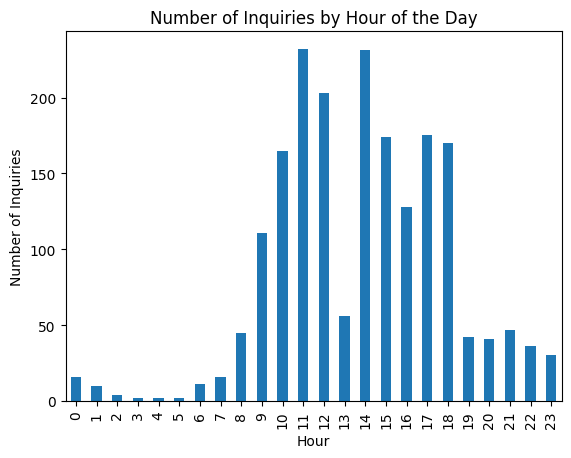

In [26]:
# Count inquiries by hour
inquiries_by_hour = df['Hour'].value_counts().sort_index()
inquiries_by_hour.plot(kind='bar')
plt.title('Number of Inquiries by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Inquiries')
plt.show()

## 8. Impact of Action Taken on Resolution
- **Effectiveness of Actions Taken:** 

Analyze the impact of different "Actions Taken" on the likelihood of resolving inquiries. This can help determine which types of interventions are most effective and guide training or process improvements.

In [27]:
# Resolution rate by action taken
action_resolution = df.groupby('Action Taken')['Has the problem resolved?'].value_counts(normalize=True).unstack().fillna(0) * 100
print(action_resolution)


Has the problem resolved?                            No   Pending         Yes
Action Taken                                                                 
Absent excused                                      0.0  0.000000  100.000000
Absent on the days of medical leave is excused      0.0  0.000000  100.000000
Adviced Accordingly                                 0.0  0.000000  100.000000
Adviced accordingly                                 0.0  2.040816   97.959184
Adviced accordingly ditawarkan program Sijil Pe...  0.0  0.000000  100.000000
...                                                 ...       ...         ...
referred to Ustazah Khadijah                        0.0  0.000000  100.000000
referred to ustazah hidayah and advised accordi...  0.0  0.000000  100.000000
reffered to ustazah layinah                         0.0  0.000000  100.000000
sijil kelulusan diperlukan dari institut pengaj...  0.0  0.000000  100.000000
yuran pendaftaran diterima                          0.0  0.00000